# Examen Final Aprendizaje Automático 3
    * Juan Sebastian Orozco Hernandez
    * 1017173516


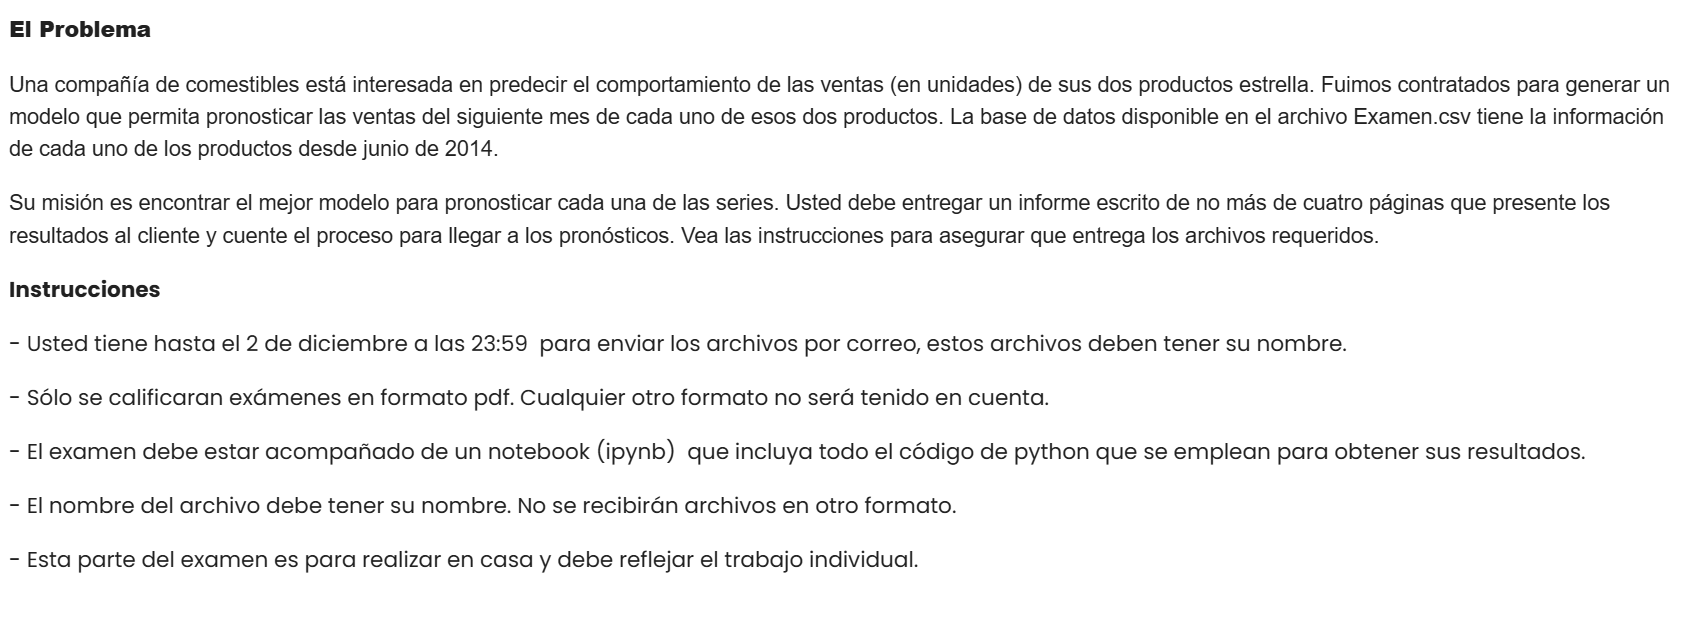

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series


In [2]:
df_original = pd.read_csv('./raw/Examen.csv')

# Análisis del dataset Original 

In [3]:
print("--- DataFrame Info --- ")
print(df_original.info())


--- DataFrame Info --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  127 non-null    int64  
 1   producto1   127 non-null    float64
 2   producto2   127 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB
None


Se observa que la empresa de comestibles tiene un conjunto de datos de 127 meses que inicia desde el mes 06 del 2014 con 3 columnas/caracteristicas con las unidades vendidas de cada uno de los 2 productos por mes.

## Análisis Exploratorio (EDA)

In [5]:

print("\n--- DataFrame Description --- ")
print(df_original.describe())



--- DataFrame Description --- 
       Unnamed: 0   producto1   producto2
count  127.000000  127.000000  127.000000
mean    64.000000  343.571660  581.037664
std     36.805797  100.234821  167.504363
min      1.000000  137.047639  200.000000
25%     32.500000  256.853812  469.194001
50%     64.000000  340.644019  626.048401
75%     95.500000  450.071775  708.941718
max    127.000000  500.000000  806.440615


En el análisis estadístico de las características del dataset, se observa que la columna del mes no tiene nombre. Para el `producto1` hay un promedio de unidades vendidas de `343.57` con una desviación estandar de `100.23`, el mes que menos se vendió fueron `137.04` unidades y el mes que más se vendió fue de `500` unidades. Así mismo se evaluó el `producto2` donde se observó un promedio de `581` unidades en los `127` meses con una desviación estandar de `167.50`, el mes que menos se vendió fue de `200` unidades y el mes que más vendió fue de `806.44`.

In [6]:

print("\n--- DataFrame Head and Tail --- ")
print(df_original.head())
print(df_original.tail())


--- DataFrame Head and Tail --- 
   Unnamed: 0   producto1   producto2
0           1  500.000000  200.000000
1           2  497.400893  210.686220
2           3  478.605317  222.018584
3           4  486.454125  233.920990
4           5  479.695678  238.402098
     Unnamed: 0   producto1   producto2
122         123  164.610771  629.293034
123         124  150.881839  637.099467
124         125  151.788470  653.155282
125         126  137.047639  672.528345
126         127  141.990873  676.058092


Se modifica el index del dataset para que tome el mes.

In [7]:
df = df_original.copy()
#renombrar columna sin nombre
df.rename(columns={df.columns[0]:'mes'}, inplace=True)
# Fecha base exacta (ej. 15 de Junio)
start_date = pd.Timestamp('2014-06-01')

# Usamos apply (un poco más lento, pero muy flexible)
df['mes'] = df['mes'].apply(lambda x: start_date + pd.DateOffset(months=x-1))


#convertir la columna mes en el index del dataframe
df.set_index('mes', inplace=True)

print("\n--- DataFrame with 'mes' as index --- ")
print(df.head())
print(df.tail())

#validar el index del dataframe
print("\n--- DataFrame Index --- ")
print(df.index)


--- DataFrame with 'mes' as index --- 
             producto1   producto2
mes                               
2014-06-01  500.000000  200.000000
2014-07-01  497.400893  210.686220
2014-08-01  478.605317  222.018584
2014-09-01  486.454125  233.920990
2014-10-01  479.695678  238.402098
             producto1   producto2
mes                               
2024-08-01  164.610771  629.293034
2024-09-01  150.881839  637.099467
2024-10-01  151.788470  653.155282
2024-11-01  137.047639  672.528345
2024-12-01  141.990873  676.058092

--- DataFrame Index --- 
DatetimeIndex(['2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='mes', leng

### Análisis univariado por cada producto

    Producto 1

(127, 2)


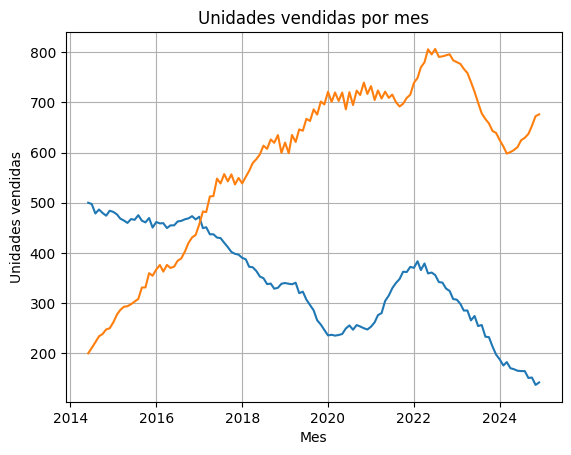

In [39]:
# imprimiendo el tamano del dataframe
print(df.shape)

# Graficando los datos
plt.title("Unidades vendidas por mes")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.plot(df[["producto1", "producto2"]])
plt.grid()
plt.show()

### Descomposición de la serie para el producto 1

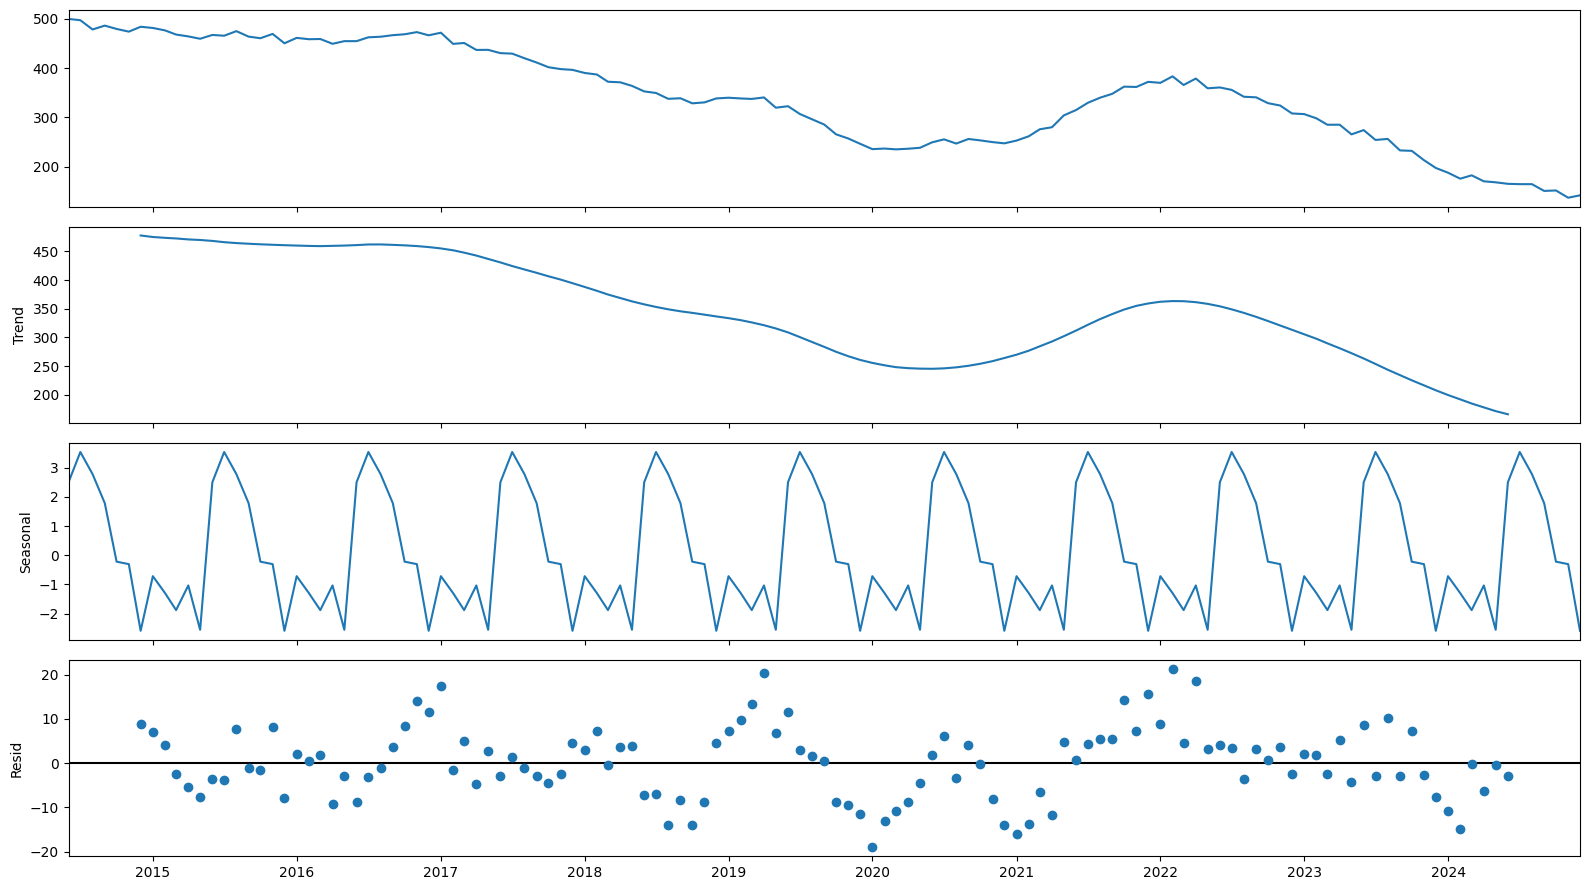

In [42]:
td_componentes = seasonal_decompose(df[["producto1",]],model="additive")
fig = td_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

### Descomposición de la serie para el producto 2

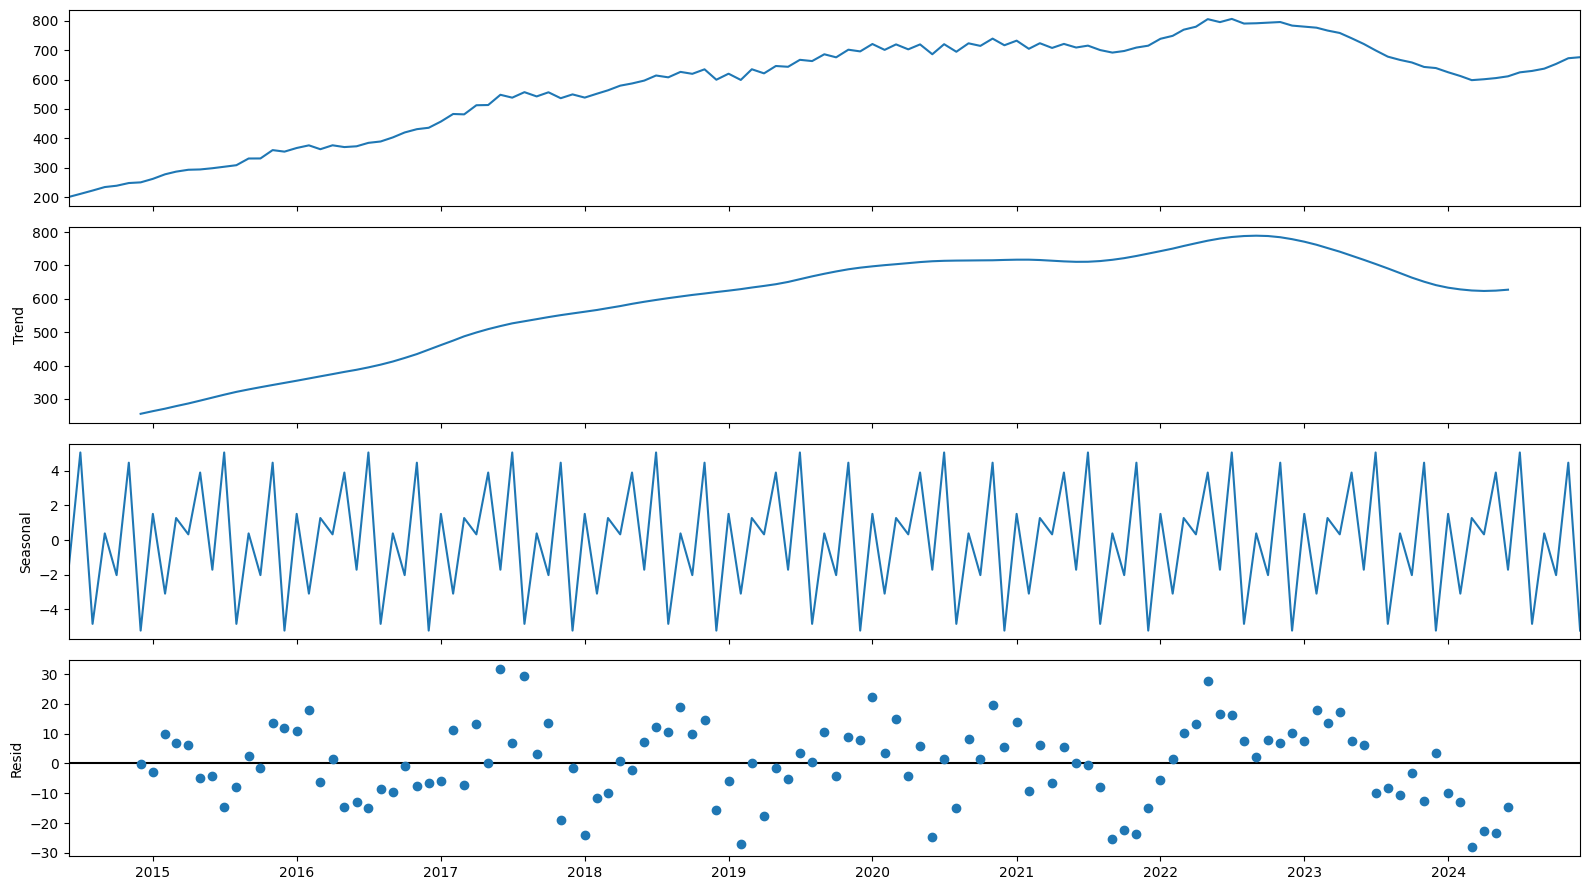

In [43]:
td_componentes = seasonal_decompose(df[["producto2",]],model="additive")
fig = td_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()